In [44]:
import numpy as np
import random
w_0 = [random.uniform(0,1)-0.5 for i in range(0,10)]
k = [random.uniform(0,1) * 0.01 for i in range(0,10)]
pos = 3
def square_loss(slope):
    S = 0
    n = 10
    l = 2
    coefficient_mat = np.array([[6,0,0,0],[6*l,2,0,0],[3*l**2,2*l,1,0],[l**3,l**2,l,1]])  
    i_coefficient_mat = np.linalg.inv(coefficient_mat)
    curve_coefficient = []
    for i in range(n-1,-1,-1):
        if i == n-1:
            #print("Start from last element")
            coe_at_i = np.dot(i_coefficient_mat,np.array([k[i]*(pos-w_0[i]),
                                0,
                                slope,
                                pos]).T)
            curve_coefficient.append(coe_at_i)
            #print(curve_coefficient)
        else:
            #print("Iteration at {}".format(i))
            a,b,c,d = curve_coefficient[-1]
            cumulated_tissue_force = sum([ k[j]*(d - w_0[i]) for j in range(i,n) ])
            coe_at_i = np.dot(i_coefficient_mat,np.array([cumulated_tissue_force,
                                2*b,
                                c,
                                d]).T)
            curve_coefficient.append(coe_at_i)
    
    for i,coe in enumerate(reversed(curve_coefficient)):
        a,b,c,d = coe
        x = np.linspace(0,l,num=10) + l*i
        element_func = a*(x - l*i)**3 + b*(x-l*i)**2 + c*(x-l*i) +d
        #slope_func = 3*a*(x - l*i)**2 + 2*b*(x-l*i) + c
        S = S + d**2 + (a*l**3+b*l**2+c*l+d)**2 + c**2 + (3*a*l**2+2*b*l+c)**2
    
    return S
    

In [45]:
square_loss(0.29964)

878.8772340681772

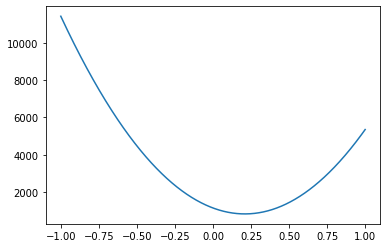

In [49]:
import matplotlib.pyplot as plt
possible_slopes = np.linspace(-1,1,num=2000)
S_list = [square_loss(slope) for slope in possible_slopes]
plt.plot(possible_slopes,S_list)

In [47]:
possible_slopes[np.argmin(S_list)]

0.2096048024012005